In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df = pd.read_json('logins.json')

In [36]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [37]:
df.set_index('login_time', inplace=True, drop=False)
#resample to 15 minutes interval

df['Count'] = 1
df = df.resample('15 min').sum()



In [38]:
df

,Count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,NaN
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


In [39]:
df['login_time'] = df.index

#extract year,month,week,day,hour,etc.
df['year'] = df['login_time'].dt.year
df['month'] = df['login_time'].dt.month
df['week'] = df['login_time'].dt.weekofyear
df['day'] = df['login_time'].dt.weekday
df['hour'] = df['login_time'].dt.hour
df['date'] = df['login_time'].dt.date
df['time'] = df['login_time'].dt.time

df.head()

,Count,login_time,year,month,week,day,hour,date,time
login_time,,,,,,,,,
1970-01-01 20:00:00,2.0,1970-01-01 20:00:00,1970,1,1,3,20,1970-01-01,20:00:00
1970-01-01 20:15:00,6.0,1970-01-01 20:15:00,1970,1,1,3,20,1970-01-01,20:15:00
1970-01-01 20:30:00,9.0,1970-01-01 20:30:00,1970,1,1,3,20,1970-01-01,20:30:00
1970-01-01 20:45:00,7.0,1970-01-01 20:45:00,1970,1,1,3,20,1970-01-01,20:45:00
1970-01-01 21:00:00,1.0,1970-01-01 21:00:00,1970,1,1,3,21,1970-01-01,21:00:00


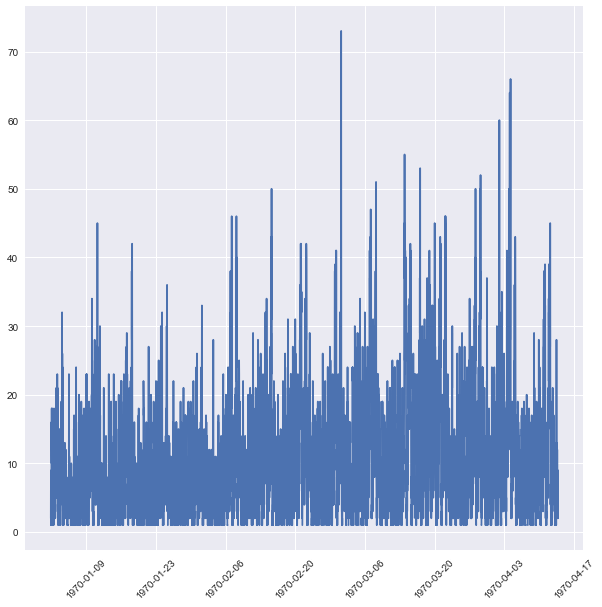

In [80]:
# Show the entire series
plt.figure(figsize=(10,10))
plt.plot(df['Count'])
plt.xticks(rotation=45);

The graph above shows that there is a trend where it spikes up then spikes down again. In some months it also tend to spike higher. Let's evaluate on a monthly basis, weekly basis, and hour basis.

In [62]:
week_df = df.groupby(['month','day']).sum()['Count'].reset_index()

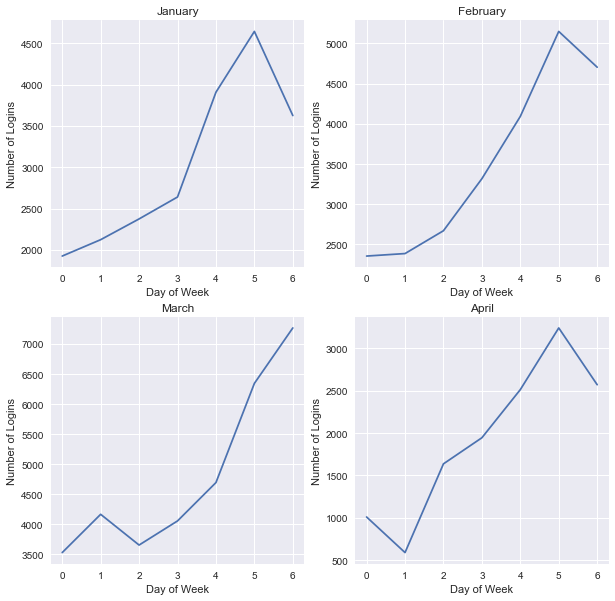

In [79]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(week_df[week_df.month == 1].day,week_df[week_df.month == 1].Count)
plt.title('January')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')

plt.subplot(2,2,2)
plt.plot(week_df[week_df.month == 2].day,week_df[week_df.month == 2].Count)
plt.title('February')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')

plt.subplot(2,2,3)
plt.plot(week_df[week_df.month == 3].day,week_df[week_df.month == 3].Count)
plt.title('March')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')

plt.subplot(2,2,4)
plt.plot(week_df[week_df.month == 4].day,week_df[week_df.month == 4].Count)
plt.title('April')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')

The general trend of logins for all four months indicate that there is increasing trend in number of logins from day 0 to day 6.

We can see that most logins occur on day 5 of the week, except in March. March also shows the month with the most logins in comparison to the other 3 months.

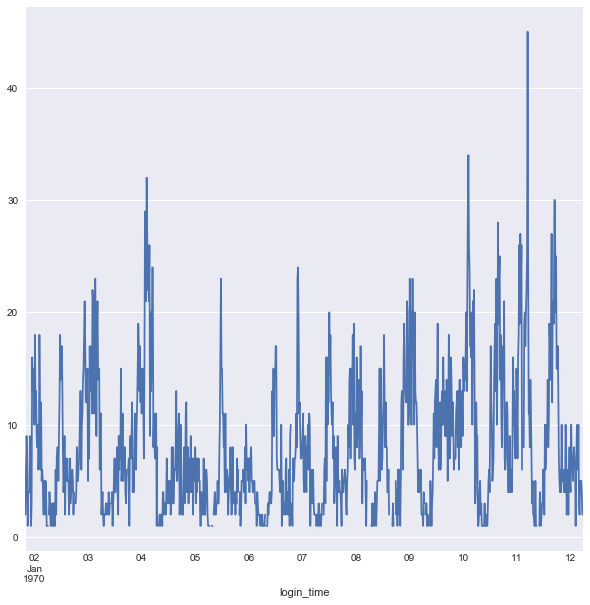

In [83]:
#let's check the trend per day:
plt.figure(figsize=(10,10))
df[0:1000].Count.plot()


We can see that on a daily basis, there are peaks every 12 hours.

(array([ 719170.,  719184.,  719198.,  719212.,  719226.,  719240.,
         719254.,  719268.]), <a list of 8 Text xticklabel objects>)

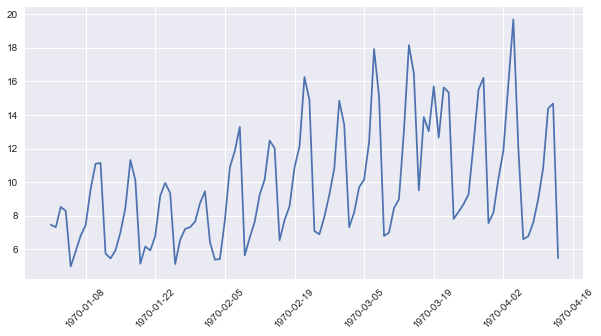

In [104]:
plt.figure(figsize=(10,5))
date_count = df.groupby('date').mean()['Count']
plt.plot(date_count)
plt.xticks(rotation=45)

The number of logins on average is increasing from January to April but there are fluctuations betweek peaks and troughs.

# Part 2: Experiment and Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.


However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment.


what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

SOLUTION:

I think that a key measure of success for this experiment is to see the percentage of time that drive from say Gotham city would spend on Metropolis. Since currently Gotham drivers would be engaged close to 100% in Gotham and close to 100% in Metropolis, we would expect the percentage to go to 50%. This is the metric i chose because we would like to see more drivers commuting to the other city given free toll costs and plan to maximize the metric.


SETTING UP THE EXPERIMENT:
The first thing to do is to reimburse all toll fees on both cities and see if there are more drivers going to the other city. Additionally, we should compare on both weekdays as well as weekends. The reason to compare on both weekdays and weekends is because there is reasonable amount of activities in both cities during weekends.


STATISTICAL TEST:

Null Hypothesis: The percentage of drivers in Gotham going to the other city  = percentage of drivers in Gotham going to other city before toll reimbursement.

Alternative Hypothesis: % of drivers in Gotham going to other city > % of drivers in Gotham going to other city before toll reimbursement.


To be able to use the z-test, we would need a sample that is large enough (n>30). We would use a 5% significance level in this case. So if we get a z-value that is greater than 1.96, we would say that we are in favor of the alternative and that due to the toll reimbursement, there are more drivers going to the other city.

Some considerations include:

1. The company could be less profitable since demand in other city stays the same and the company has more expenses on fuel and toll expenses due to reimbursements.

2. We should consider if only one city's drivers are more willing to go to the other city and the other city's is not as willing. We might need to incentivize in a different way.




# Part 3: Predictive Modeling

In [108]:
import json
with open('ultimate_data_challenge.json') as f:
       data = json.load(f)
users = pd.DataFrame(data)

In [111]:
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [112]:
users.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [118]:
#fillna with -1:
users.avg_rating_by_driver.fillna(-1,inplace=True)
users.avg_rating_of_driver.fillna(-1,inplace=True)
users.phone.fillna('none',inplace=True)

In [119]:
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [120]:
#define active users:

import datetime
from dateutil.relativedelta import relativedelta

active = []
for x in range(len(users)):
    start = pd.Timestamp(users['signup_date'][x])
    #in 6 months
    six_mos = start + relativedelta(months=6)
    #30 days before months:
    prior_30_days = six_mos-pd.Timedelta('30D')
    if prior_30_days <= pd.Timestamp(users['last_trip_date'][x]) <= six_mos:
        active.append(1)
    else:
        active.append(0)
users['active'] = active

In [122]:
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [123]:
#Figure out how many percent of users are active:
print('Percentage of Active Users:',users.active.sum()/len(users)*100)

Percentage of Active Users: 24.396


In [124]:
users.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'active'],
      dtype='object')

In [128]:
#use dummy classifier as baseline:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver',
           'avg_surge','surge_pct','trips_in_first_30_days',
           'ultimate_black_user','weekday_pct']

train,test = train_test_split(users,test_size=0.2)
dummy = DummyClassifier()
dummy.fit(train[features],train['active'])
pred = dummy.predict(test[features])
dummy_df = pd.DataFrame(pred,test['active']).reset_index()
dummy_df.columns = ['predicted','actual']
print('accuracy score:',accuracy_score(dummy_df.predicted,dummy_df.actual))
print(confusion_matrix(dummy_df.predicted,dummy_df.actual))
print(classification_report(dummy_df.predicted,dummy_df.actual))

accuracy score: 0.6345
[[5747 1837]
 [1818  598]]
             precision    recall  f1-score   support

          0       0.76      0.76      0.76      7584
          1       0.25      0.25      0.25      2416

avg / total       0.64      0.63      0.63     10000



In [129]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(train[features],train['active'])
log_pred = logit.predict(test[features])
logit_df = pd.DataFrame(log_pred,test['active']).reset_index()
logit_df.columns = ['predicted','actual']
print('accuracy score:',accuracy_score(logit_df.predicted,logit_df.actual))
print(confusion_matrix(logit_df.predicted,logit_df.actual))
print(classification_report(logit_df.predicted,logit_df.actual))

accuracy score: 0.7676
[[7466  118]
 [2206  210]]
             precision    recall  f1-score   support

          0       0.77      0.98      0.87      7584
          1       0.64      0.09      0.15      2416

avg / total       0.74      0.77      0.69     10000



In [140]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier()
clf = clf.fit(train[features], train.active)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)


In [149]:
feature_importance = pd.DataFrame(clf.feature_importances_)
feature_importance.columns = ['score']
feature_importance.sort_values('score',ascending=False,inplace=True)

In [150]:
feature_importance.head()

,score
0,0.334682
7,0.169486
2,0.107067
5,0.101292
1,0.097726


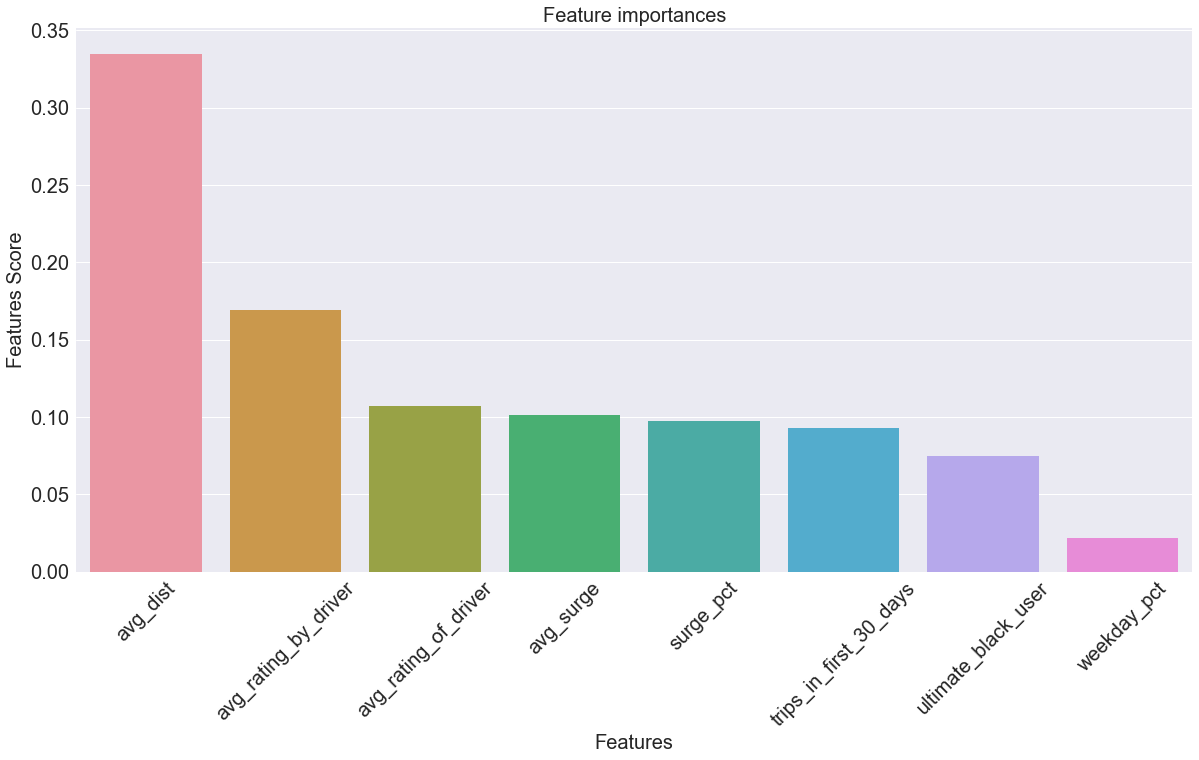

In [153]:
plt.figure(figsize=(20,10))
sns.barplot(x=train[features].columns,y=feature_importance.score)
plt.xticks(rotation=45,size=20)
plt.yticks(size=20)
plt.ylabel('Features Score',size=20)
plt.xlabel('Features',size=20)
plt.title('Feature importances',size=20)

# Recommendation

It seems that the variable that helps predict active users most is average distance, followed by average rating by driver, followed by average rating of driver, and average surge, based on feature importance graph above.

In order to improve long-term rider retention, it might be useful to create an algorithm for the taxi which minimizes the distance travelled by the passenger to his or her destination.

It also seems that average rating by driver is also important because some passengers who get lower rating might not have drivers willing to pick them up. This may result passengers to switch to other competitors' application. 

Having drivers that have high rating is also important since the data shows that average rating of driver helps improve active users for the app. This means that passengers prefer drivers that have high rating and they are likely to cancel their rides if the driver has low rating.

It might also be possible to reduce the average surge applied to passengers. Since they have low switching cost to other ride applications, users tend to prefer other competitors' price when they get high surge price from our application.